# 13.1 핵심 개념
- 릿지 회귀모델은 선형회귀분석의 기본원리를 따르나 가중치 값을 최대한 작게 만들어, 즉 0에 가깝게 만들어 모든 독립변수가 종속변수에 미치는 영향을 최소화하는 제약을 반영한 회귀모델
- 각 특성의 영향을 최소화하여 훈련데이터에 과대적합되지 않도록 제약한 모델
- 선형관계뿐만 아니라 다항곡선 추정도 가능
- 하이퍼파라미터 α : 규제를 더 혹은 덜 하게 된다 : 0에 가까울수록 규제를 하지 않고, 커질수록 더 많은 규제를 하게 된다.


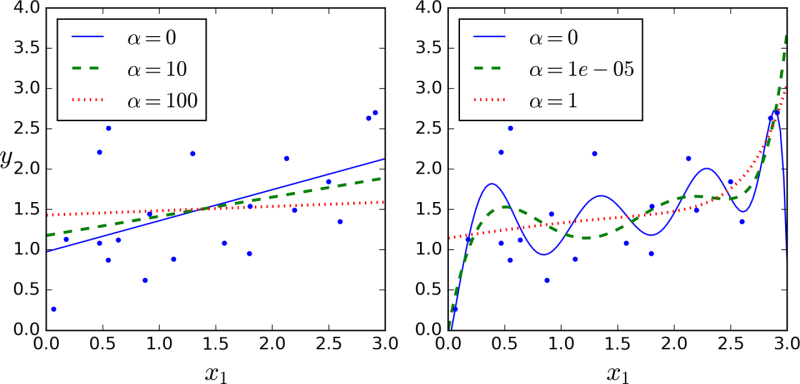

# 13.3 분석 코드

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
data2=pd.read_csv('../data/house_price.csv', encoding='utf-8')
X=data2[data2.columns[:-1]]
y=data2[['house_value']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

from sklearn.linear_model import Ridge
model=Ridge()

In [4]:
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
pred_test=model.predict(X_scaled_test)
print(f"TrainSet Score : {model.score(X_scaled_train, y_train)}\nTestSet Score: {model.score(X_scaled_test, y_test)}")

TrainSet Score : 0.5706637113374347
TestSet Score: 0.5826346815681083


In [5]:
# RMSE
import numpy as np
from sklearn.metrics import mean_squared_error
RMSE_train=np.sqrt(mean_squared_error(y_train, pred_train))
RMSE_test=np.sqrt(mean_squared_error(y_test, pred_test))
print(f"TrainSet RMSE : {RMSE_train}\nTestSet RMSE : {RMSE_test}")

TrainSet RMSE : 62538.84307329633
TestSet RMSE : 61761.900709516085


In [7]:
# GridSearch
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(Ridge(),
                        param_grid={'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
                        cv=5)
grid_search.fit(X_scaled_train, y_train)

print("Best Parameter : ",grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)
print("TestSet Score : ", grid_search.score(X_scaled_test, y_test))

Best Parameter :  {'alpha': 0.01}
Best Score :  0.5702758190029468
TestSet Score :  0.5826089063923596


In [12]:
# RandomSearch
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
random_search=RandomizedSearchCV(Ridge(),
                        param_distributions={'alpha':randint(low=0.00001, high=100)},
                        cv=5,
                        n_iter=100)
random_search.fit(X_scaled_train, y_train)

print("Best Parameter : ",random_search.best_params_)
print("Best Score : ", random_search.best_score_)
print("TestSet Score : ", random_search.score(X_scaled_test, y_test))

Best Parameter :  {'alpha': 3}
Best Score :  0.5699164959308053
TestSet Score :  0.5825244375003857
